In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
mean_01 = np.array([1.5, 4.0])
mean_02 = np.array([-1.0, -1.0])

cov_01 = np.array([[1.0, 0.0], [0.0, 1.0]])
cov_02 = np.array([[0.9, 0.3], [0.3, 0.9]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 250)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 250)

data = np.zeros((dist_01.shape[0] + dist_02.shape[0], dist_01.shape[1]))
data[:dist_01.shape[0]] = dist_01
data[dist_01.shape[0]:] = dist_02

print data.shape, data.mean(axis=0)

labels = np.zeros((data.shape[0],))
labels[:dist_01.shape[0]] = 1

print labels.shape, labels.mean()

(500, 2) [ 0.23032491  1.52607176]
(500,) 0.5


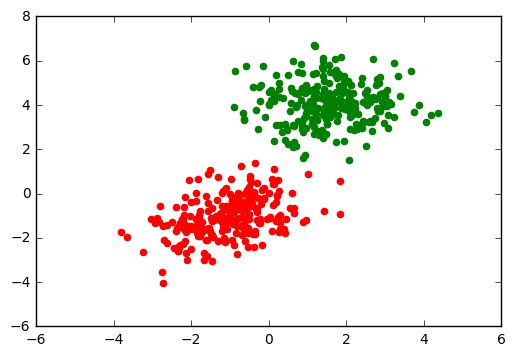

In [7]:
plt.figure(0)
for ix in range(data.shape[0]):
    if labels[ix] == 0:
        plt.scatter(data[ix, 0], data[ix, 1], color='red')
    else:
        plt.scatter(data[ix, 0], data[ix, 1], color='green')
plt.show()

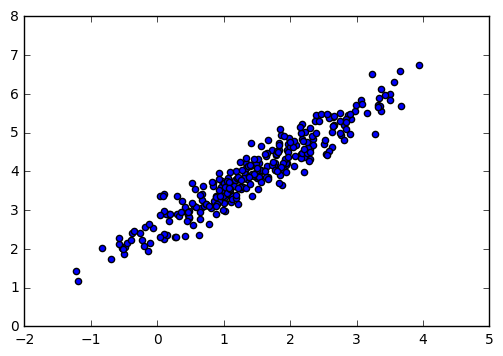

[ 2.50628828 -0.23746628  1.82743749  1.48519767  1.7649499 ]
[ 4.71611063  2.24372721  4.7238522   4.25513422  4.2057146 ]


In [111]:
cov_val = [[1, 0.95], [0.95, 1]]

dt = np.random.multivariate_normal(mean_01, cov_val, 300)

plt.scatter(dt[:, 0], dt[:, 1])
plt.show()

X = dt[:, 0]
y = dt[:, 1]

print X[:5]
print y[:5]

In [282]:
def h_val(x_data, theta=None):
    # input x_data: numpy array
    #m = len(x_data)
    h = theta[0]*x_data + theta[1]
    #for ix in range(m):
    #    h += x_data[ix]*theta[ix]
    #h += 1.0*theta[-1]
    return h

def decide(x_data, theta):
    h = hval(x_data, theta)
    if h > 0.5:
        return 1
    else:
        return 0

def compute_loss_regression(X, theta, y):
    # Returns loss for X, y and theta values
    n = X.shape[0]
    loss = 0.0
    
    for nx in range(n):
        error = (y[nx] - h_val(X[nx], theta))**2
        loss += error
    loss = loss/n
    return loss

def compute_loss_grad(X, theta, y):
    n = X.shape[0]
    grad1 = 0.0
    grad2 = 0.0
    for nx in range(n):
        error1 = (h_val(X[nx], theta) - y[nx])*X[nx]
        grad1 += error1
        
        error2 = (h_val(X[nx], theta) - y[nx])
        grad2 += error2
    grad1 = grad1/n
    grad2 = grad2/n
    return [grad1, grad2]

def update_weights(X, theta, y, alpha=0.1):
    grad = compute_loss_grad(X, theta, y)
    theta[0] = theta[0] - alpha*grad[0]
    theta[1] = theta[1] - alpha*grad[1]
    return theta

def adaptive_learning_rate(alpha, total_epochs, current_epoch):
    return alpha*np.exp(-2 * float(current_epoch) / total_epochs)

print adaptive_learning_rate(0.1, 200, 200)

0.0135335283237


In [284]:
## theta = [1, 2.0]
theta = [np.random.random(), np.random.random()]
nb_epoch = 200
alpha = 0.1

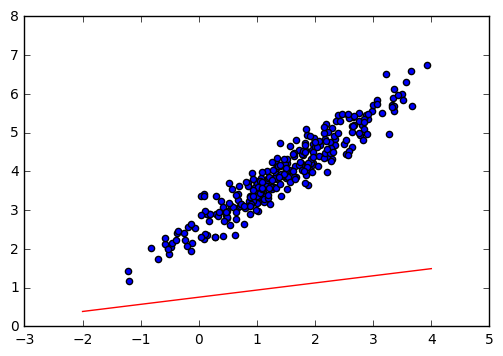

In [278]:
plt.figure(0)
plt.scatter(X, y)
pt1 = h_val(-2, theta)
pt2 = h_val(4, theta)
plt.plot([-2, 4], [pt1, pt2], 'r-')
plt.show()

In [285]:
all_loss = []
for ix in range(nb_epoch+1):
    # alpha_val = adaptive_learning_rate(alpha, current_epoch=ix, total_epochs=nb_epoch)
    alpha_val = alpha
    loss = compute_loss_regression(X, theta, y)
    all_loss.append(loss)
    if ix%10 == 0:
        print "Error at Epoch {0}:".format(ix), loss, '| alpha:', alpha_val
    theta = update_weights(X, theta, y, alpha_val)

Error at Epoch 0: 10.0044158667 | alpha: 0.1
Error at Epoch 10: 0.322433025406 | alpha: 0.1
Error at Epoch 20: 0.228176300903 | alpha: 0.1
Error at Epoch 30: 0.173126200542 | alpha: 0.1
Error at Epoch 40: 0.140741885655 | alpha: 0.1
Error at Epoch 50: 0.121691152577 | alpha: 0.1
Error at Epoch 60: 0.110484170675 | alpha: 0.1
Error at Epoch 70: 0.103891435222 | alpha: 0.1
Error at Epoch 80: 0.100013124261 | alpha: 0.1
Error at Epoch 90: 0.0977316288161 | alpha: 0.1
Error at Epoch 100: 0.0963894926336 | alpha: 0.1
Error at Epoch 110: 0.0955999536775 | alpha: 0.1
Error at Epoch 120: 0.0951354912993 | alpha: 0.1
Error at Epoch 130: 0.0948622618416 | alpha: 0.1
Error at Epoch 140: 0.094701529046 | alpha: 0.1
Error at Epoch 150: 0.0946069747039 | alpha: 0.1
Error at Epoch 160: 0.0945513511856 | alpha: 0.1
Error at Epoch 170: 0.0945186295175 | alpha: 0.1
Error at Epoch 180: 0.0944993803296 | alpha: 0.1
Error at Epoch 190: 0.0944880566026 | alpha: 0.1
Error at Epoch 200: 0.0944813951895 | alph

0.0944813951895
[0.97743839841058966, 2.5422882584532434]


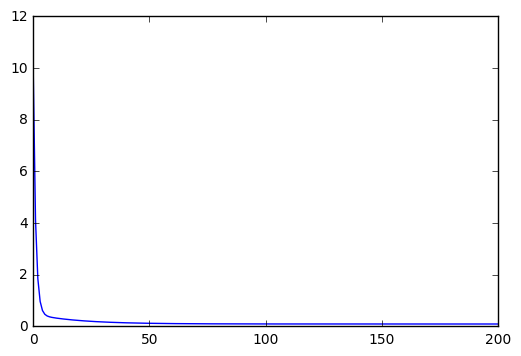

In [286]:
plt.plot(all_loss)
print all_loss[-1]
print theta
plt.show()

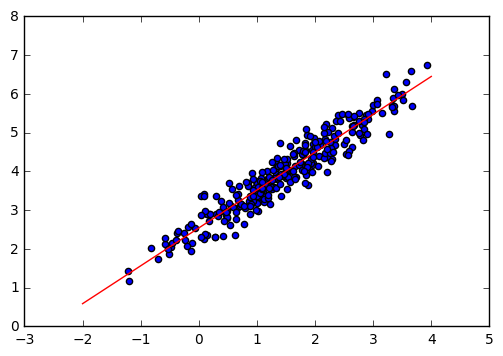

In [287]:
plt.figure(0)
plt.scatter(X, y)
pt1 = h_val(-2, theta)
pt2 = h_val(4, theta)
plt.plot([-2, 4], [pt1, pt2], 'r-')
plt.show()

In [371]:
class LogisticRegression:
    def __init__(self, X_train, y_train, alpha=0.01, nb_epochs=50):
        self.y_train = y_train
        self.alpha = alpha
        self.nb_epochs = nb_epochs
        self.dim = X_train.shape[1]
        self.X_train = np.ones((X_train.shape[0], self.dim + 1))
        self.X_train[:, 1:] = X_train
        self.theta = np.random.random((self.dim + 1, 1))
        self.loss_history = []
    
    def logit(self, x):
        return self.sigmoid(x.dot(self.theta))
    
    def sigmoid(self, z):
        return 1.0/(1.0 + np.exp(-1.0 * z))
    
    def compute_loss(self):
        n = self.X_train.shape[0]
        loss = 0.0
        for ix in range(n):
            hx = self.logit(self.X_train[ix])
            error = self.y_train[ix]*np.log(hx + 1e-03) + (1 - self.y_train[ix])*np.log(1 - hx + 1e-03)
            loss += -1.0 * error
        # loss = loss/n
        return loss
    
    def compute_grads(self):
        n = self.X_train.shape[0]
        grads = np.zeros(self.theta.shape)
        
        for ix in range(n):
            gr = -1.0 * (self.y_train[ix] - self.logit(self.X_train[ix]))*self.X_train[ix]
            # print gr.shape
            # print gr
            grads += gr.reshape(self.theta.shape)
        return grads/n
    
    def update_weights(self, alpha=None):
        if alpha == None:
            alpha = self.alpha
        
        grads = self.compute_grads()
        theta = self.theta - alpha*grads
        self.theta = theta
    
    def predict(self, x_test):
        x_vector = np.ones((1, x_test.shape[0] + 1))
        x_vector[:, 1:] = x_test
        hx = self.logit(x_vector)
        if hx < 0.5:
            return 0
        else:
            return 1
    
    def train(self, nb_epochs=None, record_loss=False):
        if nb_epochs == None:
            nb_epochs = self.nb_epochs
        
        for ex in range(nb_epochs):
            if record_loss:
                self.loss_history.append(self.compute_loss())
            self.update_weights()

In [385]:
all_data = np.zeros((data.shape[0], data.shape[1] + 1))
all_data[:, :data.shape[1]] = data
all_data[:, -1] = labels

np.random.shuffle(all_data)

In [386]:
split = int(0.8*all_data.shape[0])

data_train = all_data[:split, :-1]
data_test = all_data[split:, :-1]
labels_train = all_data[:split, -1]
labels_test = all_data[split:, -1]

lr = LogisticRegression(X_train=data_train, y_train=labels_train, alpha=0.5, nb_epochs=200)

In [387]:
print lr.X_train.shape
print lr.nb_epochs
print lr.theta.shape
lr.train(record_loss=True)

(400, 3)
200
(3, 1)


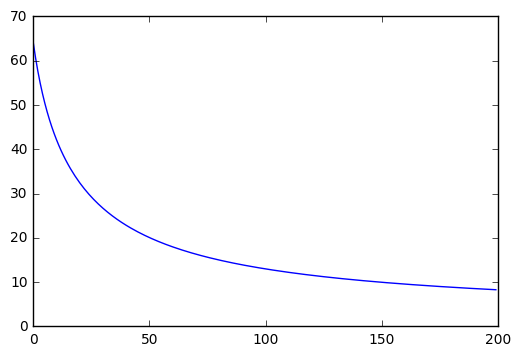

In [388]:
plt.plot(lr.loss_history)

In [389]:
print lr.theta

[[-2.58019352]
 [ 1.23069679]
 [ 1.89650049]]


In [390]:
preds = []
for ix in range(data_test.shape[0]):
    preds.append(lr.predict(data_test[ix]))

In [393]:
count = 0
for ix in range(labels_test.shape[0]):
    if preds[ix] == labels_test[ix]:
        count += 1
print "Accuracy:", float(count*100)/labels_test.shape[0]

Accuracy: 100.0


In [402]:
import sklearn
from sklearn.datasets import load_breast_cancer

In [416]:
ds = load_breast_cancer()
X = ds.data
y = ds.target

X = (X - X.mean(axis=0))/X.std(axis=0)

In [417]:
split = int(0.85*X.shape[0])
X_tr = X[:split]
X_te = X[split:]
y_tr = y[:split]
y_te = y[split:]

In [420]:
lr = LogisticRegression(X_train=X_tr, y_train=y_tr, alpha=0.1, nb_epochs=200)
lr.train(record_loss=True)

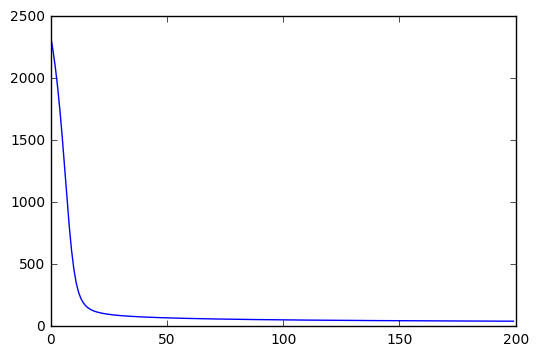

In [424]:
plt.plot(lr.loss_history)

In [428]:
counts_train = 0
for ix in range(X_tr.shape[0]):
    pred = lr.predict(X_tr[ix])
    if pred == y_tr[ix]:
        counts_train += 1

counts_test = 0
for ix in range(y_te.shape[0]):
    pred = lr.predict(X_te[ix])
    if pred == y_te[ix]:
        counts_test += 1

print "Accuracy Training:", float(counts_train*100)/y_tr.shape[0]
print "Accuracy Testing:", float(counts_test*100)/y_te.shape[0]

Accuracy Training: 97.7225672878
Accuracy Testing: 95.3488372093
